<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/Assignment/Internship/Tweet_racist_or_sexist_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries...

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

Loading dataset using pandas library...

In [36]:
train = pd.read_csv('/content/Deepti Mishra.zip  (1).csv')
test = pd.read_csv('/content/Deepti Mishra.zip .csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


Concation train and test data...

In [5]:
total_data = train.append(test,ignore_index = True)

In [6]:
total_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [7]:
total_data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze #newmusic #newsong"


Cleaning Text...

In [8]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt    

remove twitter handles (@user)

In [9]:
total_data['tweet'] = np.vectorize(remove_pattern)(total_data['tweet'], '@[\w]*')

remove special characters, numbers punctuations

In [10]:
total_data['tweet'] = total_data['tweet'].str.replace('^[a-zA-Z#]', '')

<ipython-input-10-3af025cd720e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  total_data['tweet'] = total_data['tweet'].str.replace('^[a-zA-Z#]', '')


Removing Short Words

In [11]:
total_data['tweet'] = total_data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Tokenizing tweets

In [12]:
tokenized_tweet = total_data['tweet'].apply(lambda x: x.split())

Stemming

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

stitch these tokens

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

total_data['tweet'] = tokenized_tweet

Generation and Visualization from Tweets

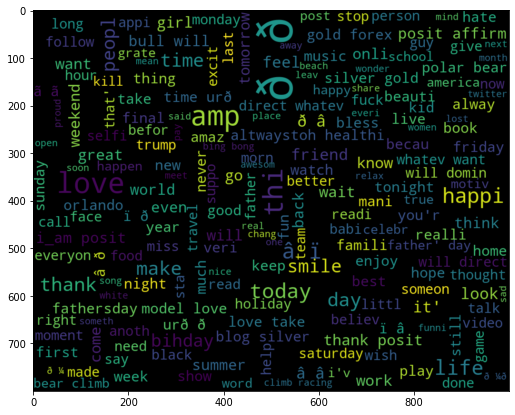

In [15]:
all_words = ' '.join([text for text in total_data['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=15, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

Words in non racist/sexist tweets

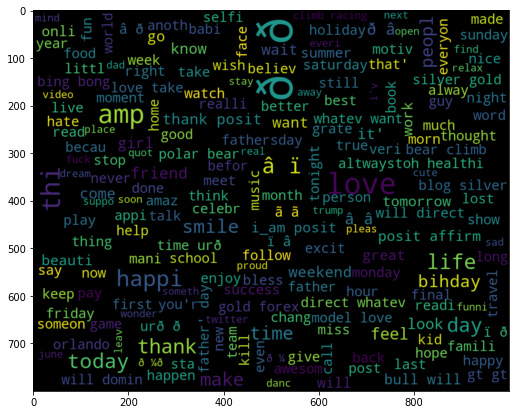

In [16]:
normal_words =' '.join([text for text in total_data['tweet'][total_data['label'] == 0]])

wordcloud = WordCloud(width=1000, height=800, random_state=15, max_font_size=100).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

Racist/Sexist Tweets

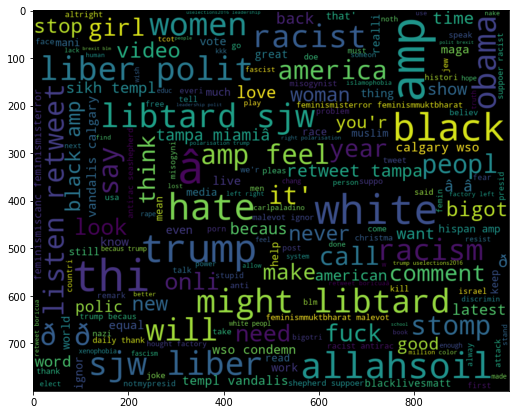

In [17]:
negative_words = ' '.join([text for text in total_data['tweet'][total_data['label'] == 1]])
wordcloud = WordCloud(width=1000, height=800,random_state=15, max_font_size=100).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

function to collect hashtags

In [18]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

extracting hashtags from non racist/sexist tweets

In [19]:
HT_regular = hashtag_extract(total_data['tweet'][total_data['label'] == 0])

extracting hashtags from racist/sexist tweets

In [20]:
HT_negative = hashtag_extract(total_data['tweet'][total_data['label'] == 1])

unnesting list

In [21]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Non-Racist/Sexist Tweets

In [22]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

selecting top 200 most frequent hashtags 

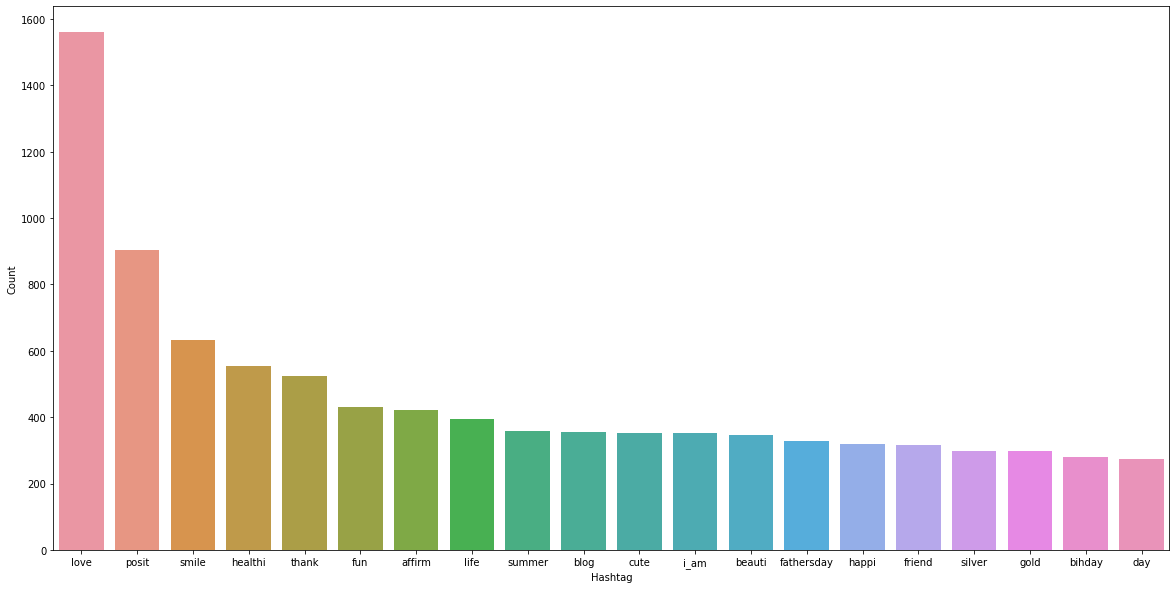

In [23]:
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")

Racist/Sexist Tweets

In [24]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

selecting top 20 most frequent hashtags

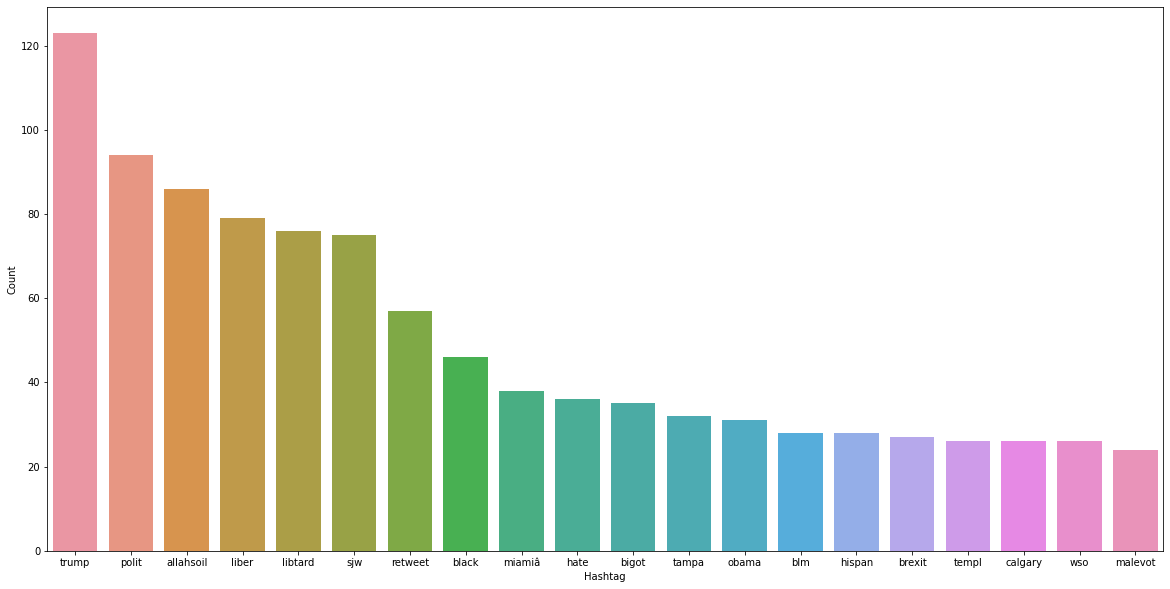

In [25]:
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(20,10))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

**Extracting Features from Cleaned Tweets**

TF-IDF Features

In [26]:
t_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = t_vectorizer.fit_transform(total_data['tweet'])

In [27]:
tfidf_train = tfidf[:31962,:]
tfidf_test = tfidf[31962:,:]

splitting data into training and validation set

In [28]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_train, train['label'], random_state=10, test_size=.2)

Loading models

In [29]:
model1 = LogisticRegression()
model2 = XGBRegressor()
model3 = XGBClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()

Fitting data to models

In [30]:
# Using LogisticRegression
model1.fit(xtrain_tfidf, ytrain)
#Using XGBRegressor
model2.fit(xtrain_tfidf, ytrain)
#Using XGBClassifier
model3.fit(xtrain_tfidf, ytrain)
#Using RandomForestClassifier
model4.fit(xtrain_tfidf, ytrain)
#Using DecisionTreeClassifier
model5.fit(xtrain_tfidf, ytrain)

[13:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


DecisionTreeClassifier()

predicting with model

In [50]:
# Using LogisticRegression
prediction1 =  model1.predict(xvalid_tfidf)
prediction_int1 = prediction1.astype(np.int)
#Using XGBRegressor
prediction2 =  model2.predict(xvalid_tfidf)
prediction_int2 = prediction2.astype(np.int)
#Using XGBClassifier
prediction3 =  model3.predict(xvalid_tfidf)
prediction_int3 = prediction3.astype(np.int)
#Using RandomForestClassifier
prediction4 =  model4.predict(xvalid_tfidf)
prediction_int4 = prediction4.astype(np.int)
#Using DecisionTreeClassifier
prediction5 =  model3.predict(xvalid_tfidf)
prediction_int5 = prediction5.astype(np.int)

Calculating f1_score and accuracy_score

In [51]:
# Using LogisticRegression
f1_t1 = f1_score(yvalid, prediction_int1)
accuracy_t1 = accuracy_score(yvalid, prediction_int1)
print(f'Using LogisticRegression f1_score is : {f1_t1:.2f} and accuracy_score is : {accuracy_t1:.2f}')
#Using XGBRegressor
f1_t2 = f1_score(yvalid, prediction_int2)
accuracy_t2 = accuracy_score(yvalid, prediction_int2)
print(f'Using XGBRegressor f1_score is : {f1_t2:.2f} and accuracy_score is : {accuracy_t2:.2f}')
#Using XGBClassifier
f1_t3 = f1_score(yvalid, prediction_int3)
accuracy_t3 = accuracy_score(yvalid, prediction_int3)
print(f'Using XGBClassifier f1_score is : {f1_t3:.2f} and accuracy_score is : {accuracy_t3:.2f}')
#Using RandomForestClassifier
f1_t4 = f1_score(yvalid, prediction_int4)
accuracy_t4 = accuracy_score(yvalid, prediction_int4)
print(f'Using RandomForestClassifier f1_score is : {f1_t4:.2f} and accuracy_score is : {accuracy_t4:.2f}')
#Using DecisionTreeClassifier
f1_t5 = f1_score(yvalid, prediction_int5)
accuracy_t5 = accuracy_score(yvalid, prediction_int5)
print(f'Using DecisionTreeClassifier f1_score is : {f1_t5:.2f} and accuracy_score is : {accuracy_t5:.2f}')

Using LogisticRegression f1_score is : 0.49 and accuracy_score is : 0.95
Using XGBRegressor f1_score is : 0.00 and accuracy_score is : 0.93
Using XGBClassifier f1_score is : 0.35 and accuracy_score is : 0.94
Using RandomForestClassifier f1_score is : 0.58 and accuracy_score is : 0.95
Using DecisionTreeClassifier f1_score is : 0.35 and accuracy_score is : 0.94


As RandomForestClassifier gives more f1_score and accuracy_score so predicting test set with RandomForestClassifier

In [52]:
prediction_test = model4.predict_proba(tfidf_test) # predicting on the testset
prediction_test = prediction_test[:,1] >= .3
prediction_test = prediction_test.astype(np.int)

Export submission file

In [53]:
print(prediction_test)

[0 1 0 ... 1 0 0]


In [55]:
test['label'] = prediction_test
submission1 = test[['id','label']]
submission2 = test[['id','tweet','label']]
submission1.to_csv('submission.csv', index=False) # writing data to a CSV file
submission2.to_csv('submission_with_tweet.csv', index=False) # writing data to a CSV file